In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/RunIIFall17NanoAODv7/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/587E2464-42CA-3A45-BD49-D23E49F658E6.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=10).events()

In [3]:
print([field for field in events.fields if 'LHE' in field])
print([field for field in events.fields if 'Gen' in field])
print([field for field in events.GenJet.fields])

['LHEWeight', 'LHEReweightingWeight', 'LHE', 'LHEScaleWeight', 'LHEPdfWeight', 'LHEPart']
['GenJet', 'GenIsolatedPhoton', 'Generator', 'GenJetAK8', 'GenMET', 'GenPart', 'SubGenJetAK8', 'GenVisTau', 'GenDressedLepton']
['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']


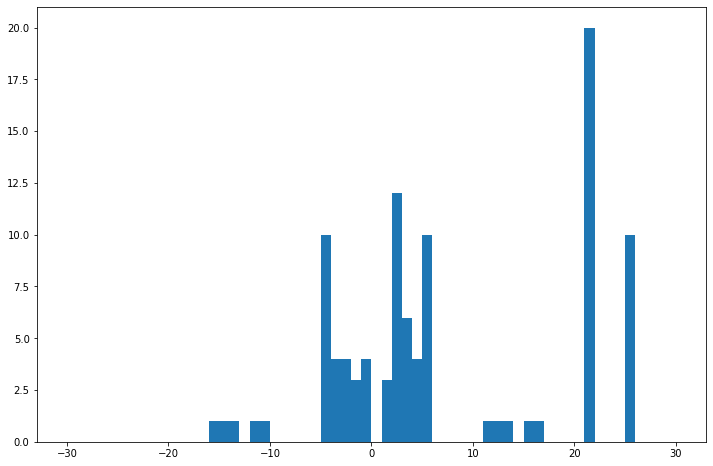

In [4]:
pdg = events.LHEPart.pdgId
plt.figure(figsize=[12,8])
plt.hist(ak.flatten(pdg), bins=np.arange(-30,31,1));

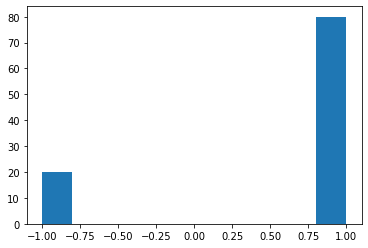

In [5]:
plt.hist(ak.flatten(events.LHEPart.status));

In [6]:
print("This is a dilepton event:")
for id in events[(ak.num(events.Electron.pt) + ak.num(events.Muon.pt)) == 2].LHEPart.pdgId[0]:
    print(id)

This is a dilepton event:
21
21
25
21
5
-5
-1
2
3
-4


In [7]:
print(events.Jet.genJetIdx[5])
print(events.GenJet[5].partonFlavour)

[1, 2, 0, -1, 3, 4, 5]
[5, -5, 21, 0, -5, 21]


In [17]:
isHiggs = (events.GenPart.pdgId == 25)
isPrompt = events.GenPart.hasFlags(['isPrompt'])
print(events.GenPart.childrenIdxG)
print(ak.num(events.GenPart.childrenIdxG, axis=2))
hasTwoChildren = ak.num(events.GenPart.childrenIdxG, axis=2) == 2
events.GenPart[isHiggs & isPrompt & hasTwoChildren][0].tolist()

[[[2, 3, 4, 5], [], [6], [11], [12], [49, ... [], [], [], [], [], [], [], [], []]]
[[4, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


[{'eta': -0.2978515625,
  'mass': 125.0,
  'phi': 0.4609375,
  'pt': 141.0,
  'genPartIdxMother': 9,
  'pdgId': 25,
  'status': 62,
  'statusFlags': 10497,
  'genPartIdxMotherG': 9,
  'distinctParentIdxG': 0,
  'childrenIdxG': [23, 24],
  'distinctChildrenIdxG': [23, 24, 26, 32]}]

In [9]:
events.GenPart[(0,6)].hasFlags(['isPrompt'])

True

In [10]:
part = events.GenPart[(0,6)]
while(True):
    print(len(part.childrenIdxG))
    part = events.GenPart[(0,part.childrenIdxG[0])]
    if part.pdgId != 25:
        break

1
1
1
1
2


In [11]:
events.GenPart[(0,[23,24])].pt

<Array [98.5, 49.5] type='2 * float32[parameters={"__doc__": "pt"}]'>

In [18]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG']

In [30]:
events.GenPart[events.GenPart]

<Array [-1, -1, 88, 88, ... 172, 171, 170, 170] type='89 * int64[parameters={"__...'>